In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
 from food.tools import *

In [43]:
url = 'https://image.shutterstock.com/z/stock-photo-healthy-salad-bowl-with-quinoa-tomatoes-chicken-avocado-lime-and-mixed-greens-lettuce-parsley-521741356.jpg'
image = get_image_from_url(url)
image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [44]:
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

In [45]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [63]:
k = 5
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [64]:
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

In [65]:
np.unique(labels)

array([0, 1, 2, 3, 4], dtype=int32)

In [60]:
labels[labels!=2]=0

In [66]:
segmented_image = centers[labels.flatten()]

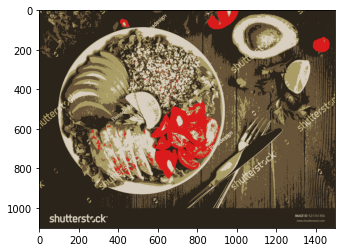

In [67]:
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

In [68]:
centers

array([[ 43,  36,  27],
       [104,  84,  56],
       [169, 156, 100],
       [217,  28,  27],
       [216, 207, 193]], dtype=uint8)